In [1]:
import torch
import matplotlib.pyplot as plt

# **TENSORS**


Tensor = Multi Dimensional Array

0D Tensor -> Scalar (Numbers)
1D Tensor -> Vector (Normal 1D Array)
2D Tensor -> Matrix
3D Tensor -> Vector of Matrices

nD Tensor is just an nD array.


Tensors are fundamental data structure of Deep Learning


Similar to numpy arrays but can run on GPUs and automatically compute gradients.


In [2]:
scalar = torch.tensor(5, dtype = torch.double)
print(scalar.ndim)

vector = torch.tensor([1,2,3], dtype = torch.int)
print(vector.ndim)

matrix = torch.tensor([[1,2,3], [4,5,6]], dtype = torch.float)
print(matrix.ndim)

cube = torch.tensor([[[1,2,3],[4,5,6]], [[1,2,3], [4,5,6]]], dtype = torch.long)
print(cube.ndim)

0
1
2
3


In [3]:
print(scalar.size())
print(vector.size())
print(matrix.size())
print(cube.size())

torch.Size([])
torch.Size([3])
torch.Size([2, 3])
torch.Size([2, 2, 3])


In [4]:
print(vector[1])
print(vector[-3])
print(matrix[1])
print(matrix[0][2])
print(cube)
print(cube[0])
print(cube[0][1])
print(cube[0][1][2])

tensor(2, dtype=torch.int32)
tensor(1, dtype=torch.int32)
tensor([4., 5., 6.])
tensor(3.)
tensor([[[1, 2, 3],
         [4, 5, 6]],

        [[1, 2, 3],
         [4, 5, 6]]])
tensor([[1, 2, 3],
        [4, 5, 6]])
tensor([4, 5, 6])
tensor(6)


In [5]:
print(matrix[0,2])
print(cube[0,1,2])

tensor(3.)
tensor(6)


*Typecasting Tensors*

In [6]:
print(scalar.dtype)
int_scalar = scalar.float()
print(int_scalar.dtype)

torch.float64
torch.float32


In [7]:
int_tensor = torch.ones(10000000, dtype = torch.int)
float_tensor = torch.ones(10000000, dtype = torch.float)
double_tensor = torch.ones(10000000, dtype = torch.double)
long_tensor = torch.ones(10000000, dtype = torch.long)
bool_tensor = torch.ones(10000000, dtype = torch.bool)

print(f"Size of int tensor: {int_tensor.element_size()*int_tensor.nelement()/1e6} MB")
print(f"Size of float tensor: {float_tensor.element_size()*float_tensor.nelement()/1e6} MB")
print(f"Size of double tensor: {double_tensor.element_size()*double_tensor.nelement()/1e6} MB")
print(f"Size of long tensor: {long_tensor.element_size()*long_tensor.nelement()/1e6} MB")
print(f"Size of bool tensor: {bool_tensor.element_size()*bool_tensor.nelement()/1e6} MB")


Size of int tensor: 40.0 MB
Size of float tensor: 40.0 MB
Size of double tensor: 80.0 MB
Size of long tensor: 80.0 MB
Size of bool tensor: 10.0 MB


Data as a batch - each row contains an example and column represents height (cm), weight (kg), age (years).

In [8]:
batch = torch.tensor([
    [170, 65, 25],
    [180, 80, 30],
    [165, 55, 22]
], dtype = torch.float)

print(batch.size())
print(batch.shape)

heights = batch[:, 0]
print(heights)
print(f"Average height is {heights.mean()} cm")
print(f"Median height is {heights.median()} cm")
print(f"Mean of complete batch is {batch.mean()}")

torch.Size([3, 3])
torch.Size([3, 3])
tensor([170., 180., 165.])
Average height is 171.6666717529297 cm
Median height is 170.0 cm
Mean of complete batch is 88.0


Image Tensor - Create an image tensor defining a 3x2 pixelated image. Use RGB format.

In [9]:
image = torch.tensor([
    [[255, 0, 0], [0, 255, 0], [0, 0, 0]],
    [[0, 0, 255], [100, 100, 100], [255, 255, 255]]
], dtype = torch.float)

print(image.shape)

red = image[:, :, 0]
blue = image[:, :, 1]
green = image[:, :, 2]
print(red)
print(blue)
print(green)

torch.Size([2, 3, 3])
tensor([[255.,   0.,   0.],
        [  0., 100., 255.]])
tensor([[  0., 255.,   0.],
        [  0., 100., 255.]])
tensor([[  0.,   0.,   0.],
        [255., 100., 255.]])


Since the image is only 2x2 pixels, it will appear very small and blocky. `matplotlib.pyplot.imshow()` is used to display array-like data as an image. We normalize the pixel values by dividing by 255.0 to bring them into the typical [0, 1] range expected for float image data, although `imshow` can often handle [0, 255] floats directly.

To hide the axes in a `matplotlib` plot, you can use the `plt.axis('off')` command. This is particularly useful when displaying images where you often don't need the numerical axis labels or tick marks.

(np.float64(-0.5), np.float64(2.5), np.float64(1.5), np.float64(-0.5))

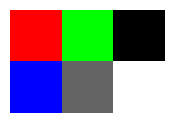

In [10]:
plt.figure(figsize=(2,2))
plt.imshow(image/255.0) #Normalizing to range 0,1
plt.axis('off')

(np.float64(-0.5), np.float64(99.5), np.float64(99.5), np.float64(-0.5))

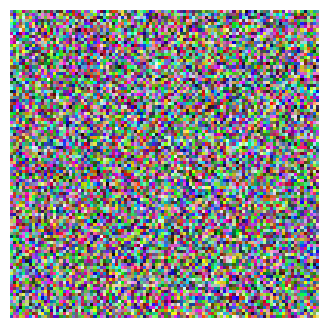

In [11]:
random_image = torch.rand(3,100,100) #Generates numbers between 0 and 1. No normalization needed. This is channel first format.
plt_image = random_image.permute(1,2,0) #This is channel last format. Matplotlib expects channel last format.
plt.figure(figsize=(10,4))
plt.imshow(plt_image)
plt.axis('off')

In [12]:
def show_image(image):
  plt.figure(figsize=(10,4))
  plt.imshow(image)
  plt.axis('off')

def show_batch(batch):
  for image in batch:
    plt_image = image.permute(1,2,0)
    show_image(plt_image)

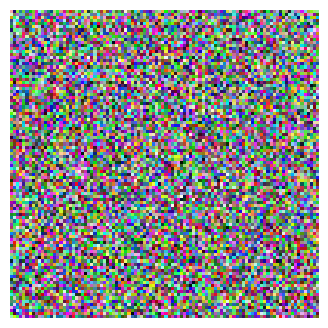

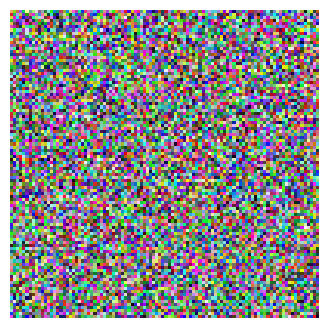

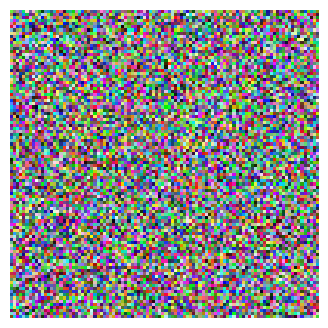

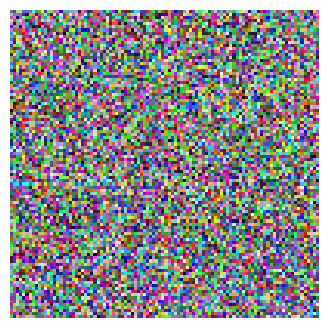

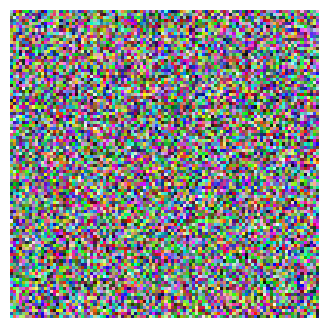

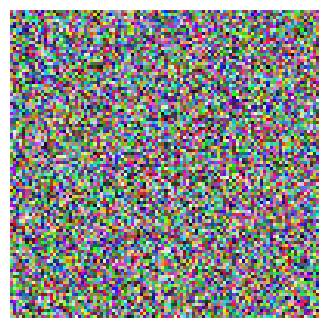

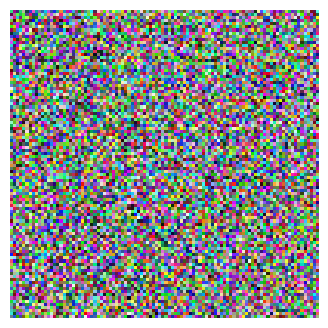

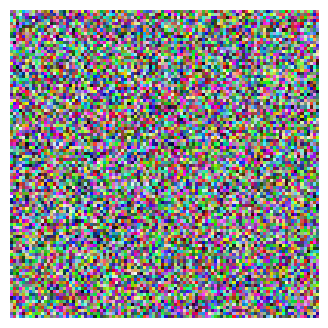

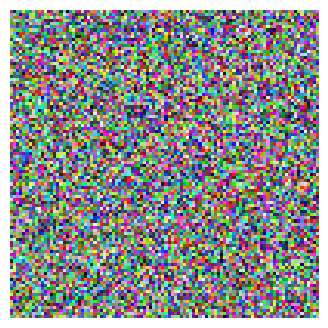

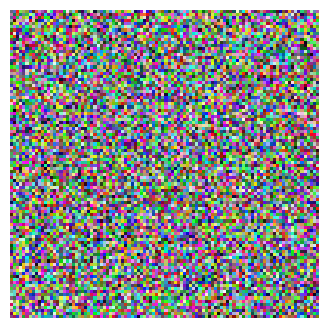

In [13]:
random_batch = torch.rand(10, 3, 100, 100) #PyTorch usses channel first, matplotlib uses channel last.
show_batch(random_batch)

# **TENSOR ADDITION**

In [14]:
a = torch.tensor(2)
b = torch.tensor(4)
print(a+b)

a = torch.ones(3, dtype = torch.int)
b = torch.ones(3, dtype = torch.int)
print(a+b)

a = torch.ones(3, dtype = torch.int)
b = torch.ones(3, dtype = torch.float)
print(a+b)



tensor(6)
tensor([2, 2, 2], dtype=torch.int32)
tensor([2., 2., 2.])


Note - Tensor addition is element wise. So shapes of the 2 tensors being added must match.


**Broadcasting** - This is adding a scalar to a tensor. suppose you add a number to a vector. PyTorch converts the number into a vector for that size with each eleemnt of it equal to the number and then adds.


In [15]:
a = torch.tensor(2)
b = torch.tensor([1,2,3])
c = torch.tensor([
    [2,3,4],
    [5,6,7]
])
print(a+b)
print(a+c)

tensor([3, 4, 5])
tensor([[4, 5, 6],
        [7, 8, 9]])


Higher dimensional broadcasting - 2D to 3D addition.

In [16]:
a = torch.tensor([1,2,3])
b = torch.tensor([
    [1,2,3],
    [4,5,6],
    [7,8,9]
])
print(a+b)

tensor([[ 2,  4,  6],
        [ 5,  7,  9],
        [ 8, 10, 12]])


**Check point 2** - Use tensor addition to adjust image brightness.

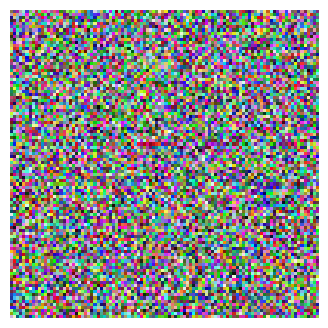

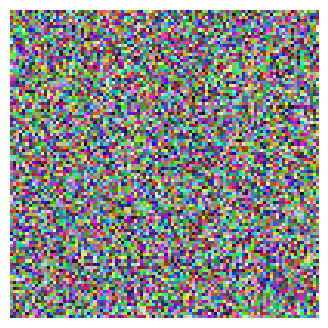

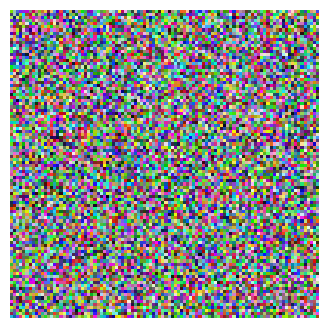

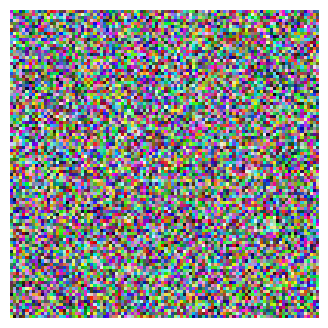

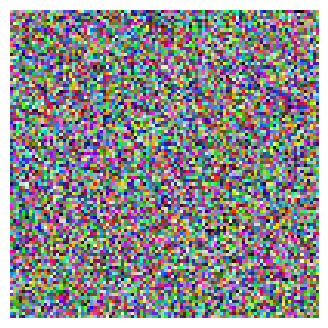

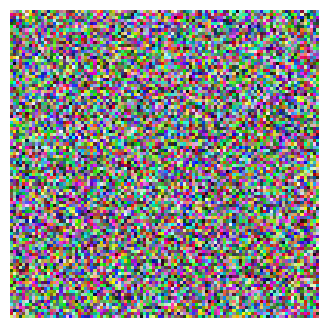

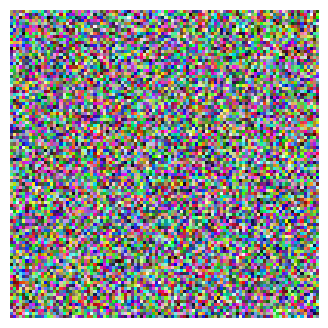

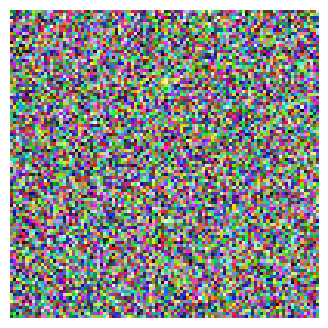

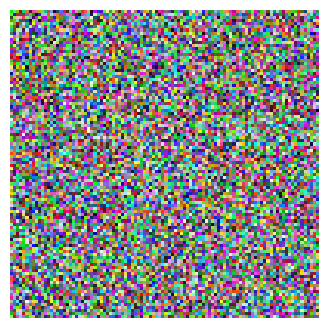

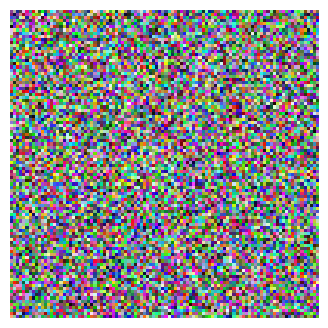

In [17]:
random_images = torch.rand(10, 3, 100, 100, dtype = torch.float)
show_batch(random_images)

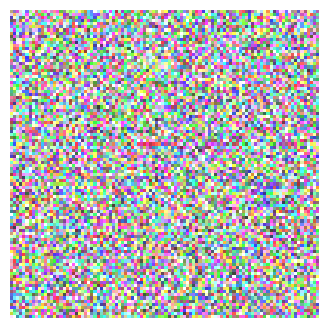

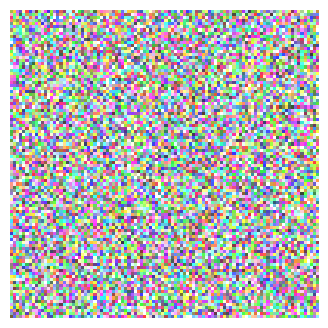

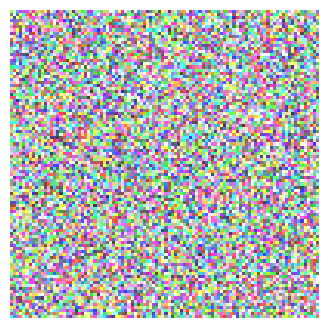

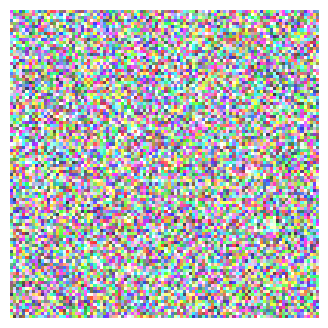

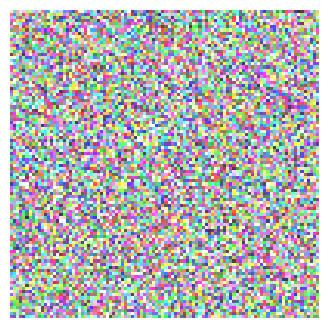

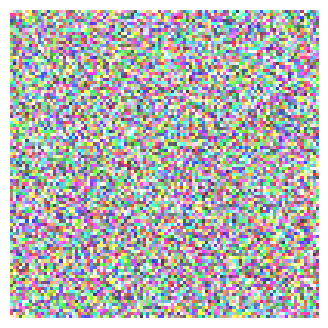

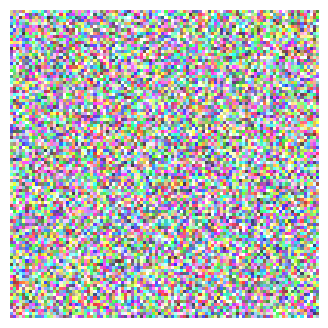

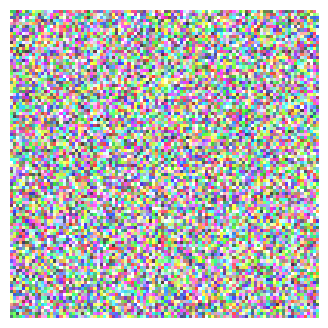

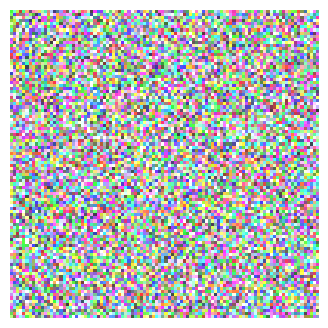

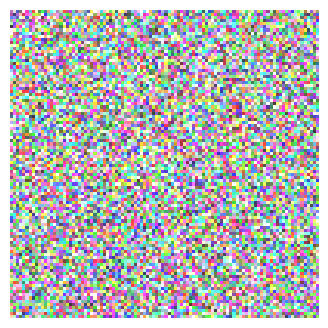

In [18]:
def increase_brightness(batch, brightness):
  inc = torch.tensor(brightness)
  for image in batch:
    new_image = (image*255.0 + inc)/255.0
    plt_image = new_image.permute(1,2,0)
    show_image(plt_image)

increase_brightness(random_images, 50)


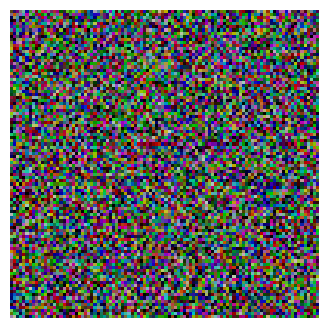

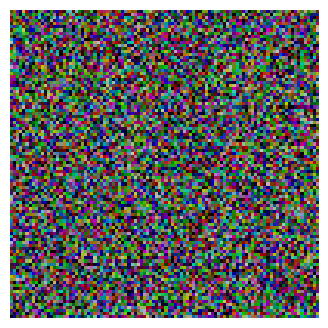

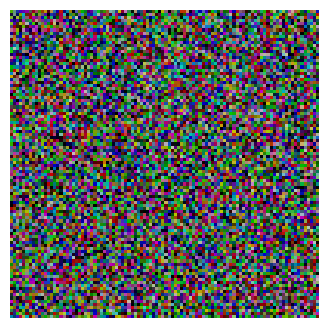

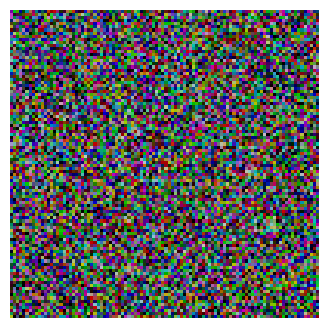

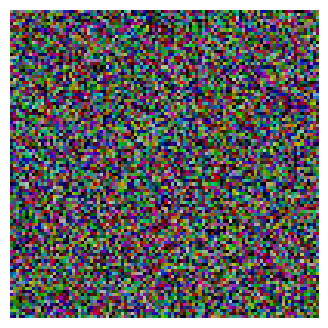

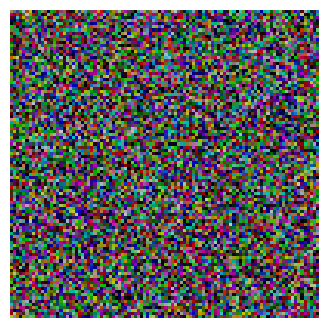

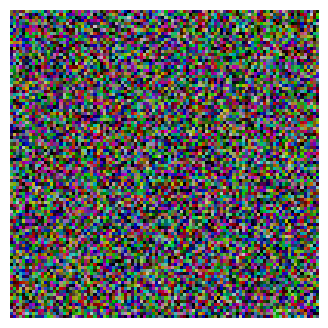

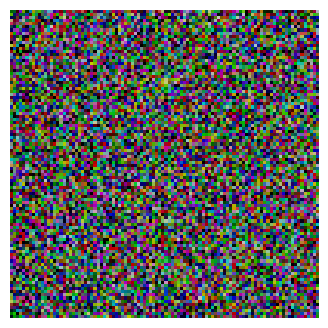

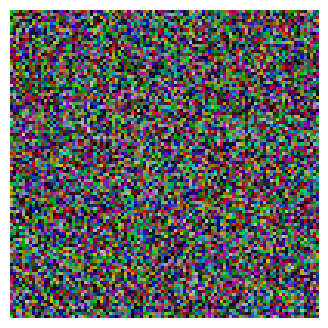

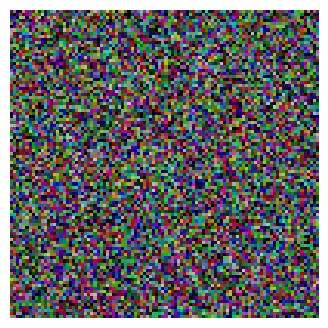

In [19]:
increase_brightness(random_images, -50)

# **Multiplying Vectors and Matrices**

**1. Dot Product**

In [20]:
a = torch.tensor([1,2,3])
b = torch.tensor([4,5,6])

c = torch.dot(a,b)

print(c)

tensor(32)


**2. Matrix Multiplication**

In [21]:
a = torch.tensor([
    [1,2],
    [3,4]
])

b = torch.tensor([
    [5,6],
    [7,8]
])

c = a@b #@ does matrix multiplication. But only works for pytorch tensors not python lists.

print(c)

tensor([[19, 22],
        [43, 50]])


**Note** - For Matrix Multiplication, shapes must be compatible. Inner dimensions must match. For 2 matrices of dimensions (m,n) and (n,p), dimensions of the matrix product are (m, p). Note that the second dimension of 1st matrix must be same as the 1st dimension of 2nd matrix or in case of mismatch one of them should be 1. In the case of 1, product is a square matrix. This is the case of matrix vector multiplication and generalizes well for multiplying tensors of different dimensions.

In [22]:
a = torch.tensor([
    [[1,2,3], [4,5,6], [7,8,9]],
    [[10,11,12], [13,14,15], [16,17,18]]
], dtype = torch.float)

b = torch.tensor(18, dtype = torch.float)

c = a + b

d = a@c

print(d)

tensor([[[ 138.,  144.,  150.],
         [ 336.,  351.,  366.],
         [ 534.,  558.,  582.]],

        [[1029., 1062., 1095.],
         [1308., 1350., 1392.],
         [1587., 1638., 1689.]]])


**Example** - Matrix Multiplication for Neural Network Layer - outputs from inputs and weights.

In [23]:
inputs = torch.tensor([
    [1,2,3],
    [4,5,6]
], dtype = torch.float)

weights = torch.tensor([
    [1,2,3,4],
    [5,6,7,8],
    [9,10,11,12]
], dtype = torch.float)

outputs = inputs @ weights

print(outputs)

tensor([[ 38.,  44.,  50.,  56.],
        [ 83.,  98., 113., 128.]])


# **Transposing Tensors**

In [24]:
x = torch.tensor([
    [1,2,3],
    [4,5,6]
])
xT = x.T
print(x.shape)
print(xT.shape)

y = torch.tensor([[1,2,3]])
yT = y.T
print(y)
print(yT)
print(y.shape)
print(yT.shape)

torch.Size([2, 3])
torch.Size([3, 2])
tensor([[1, 2, 3]])
tensor([[1],
        [2],
        [3]])
torch.Size([1, 3])
torch.Size([3, 1])


In [25]:
x = torch.tensor([
    [1,2,3],
    [4,5,6]
])

y = torch.tensor([
    [1,2],
    [3,4],
    [4,5],
    [5,6]
])

z = y @ x

print(z)

tensor([[ 9, 12, 15],
        [19, 26, 33],
        [24, 33, 42],
        [29, 40, 51]])


Transpose can be used to multiply matrices if they are in compatible for matrix multiplication initially.

In [26]:
a = torch.tensor([1,2,3])
b = torch.tensor([4,5,6])

c = a @ b

print(c)

tensor(32)


# **Reshaping Data**

In [27]:
vector = torch.tensor([1,2,3,4,5,6,7,8])

print(vector)

matrix = vector.reshape(2,4)

print(matrix)

cube = vector.reshape(2,2,2)

print(cube)

tensor([1, 2, 3, 4, 5, 6, 7, 8])
tensor([[1, 2, 3, 4],
        [5, 6, 7, 8]])
tensor([[[1, 2],
         [3, 4]],

        [[5, 6],
         [7, 8]]])


In [28]:
flatten_cube = cube.flatten()
print(flatten_cube)

flatten_reshape = flatten_cube.reshape(2,2,-1) #-1 makes pytorch figure out that dimension. Only 1 -1 allowed.
print(flatten_reshape)

tensor([1, 2, 3, 4, 5, 6, 7, 8])
tensor([[[1, 2],
         [3, 4]],

        [[5, 6],
         [7, 8]]])


In [29]:
a = torch.tensor([1,2,3])
b = a.unsqueeze(dim = 1)
c = b.unsqueeze(dim = 2) #Adds dimension at 2.
print(a)
print(c)
print(a.shape)
print(c.shape)

d = c.squeeze() #Removes dimensions with value 1
print(d)
print(d.shape)

tensor([1, 2, 3])
tensor([[[1]],

        [[2]],

        [[3]]])
torch.Size([3])
torch.Size([3, 1, 1])
tensor([1, 2, 3])
torch.Size([3])


In [30]:
a = torch.tensor([1,2,3,4,5,6,7,8])
b = torch.tensor([9,10,11,12,13,14,15,16])

c = a.reshape(2,4)
d = b.reshape(2,4)

e = a.reshape(2,2,2)
f = b.reshape(2,2,2)

g = torch.cat([c,d], dim = 0)
h = torch.cat([c,d], dim = 1)

i = torch.cat([e,f], dim = 0)
j = torch.cat([e,f], dim = 1)
k = torch.cat([e,f], dim = 2)

print(g)
print(h)
print(i)
print(j)
print(k)

tensor([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12],
        [13, 14, 15, 16]])
tensor([[ 1,  2,  3,  4,  9, 10, 11, 12],
        [ 5,  6,  7,  8, 13, 14, 15, 16]])
tensor([[[ 1,  2],
         [ 3,  4]],

        [[ 5,  6],
         [ 7,  8]],

        [[ 9, 10],
         [11, 12]],

        [[13, 14],
         [15, 16]]])
tensor([[[ 1,  2],
         [ 3,  4],
         [ 9, 10],
         [11, 12]],

        [[ 5,  6],
         [ 7,  8],
         [13, 14],
         [15, 16]]])
tensor([[[ 1,  2,  9, 10],
         [ 3,  4, 11, 12]],

        [[ 5,  6, 13, 14],
         [ 7,  8, 15, 16]]])


In [31]:
print(i.shape)
print(j.shape)
print(k.shape)

torch.Size([4, 2, 2])
torch.Size([2, 4, 2])
torch.Size([2, 2, 4])


**Note** - Dimensions not being concatenated must match exactly

In [32]:
l = torch.stack((a,b,a)) #Stacks a,b,a on top of each other making a new dimension
print(l.shape)
print(l)

#Note - stacked tensors must have same shapes

torch.Size([3, 8])
tensor([[ 1,  2,  3,  4,  5,  6,  7,  8],
        [ 9, 10, 11, 12, 13, 14, 15, 16],
        [ 1,  2,  3,  4,  5,  6,  7,  8]])


**Application 1** - Combining train and test data.

In [33]:
train_data = torch.randn(100, 10, 5)
test_data = torch.randn(20, 10, 5)

combined_data = torch.cat([train_data, test_data], dim = 0)
print(combined_data.shape)

torch.Size([120, 10, 5])


**Aplication 2** - Creating batches of data

In [34]:
sample1 = torch.randn(10,2)
sample2 = torch.randn(10,2)
sample3 = torch.randn(10,2)

batch = torch.stack([sample1, sample2, sample3])
print(batch.shape)

torch.Size([3, 10, 2])


# **Special Tensors**

It's a good idea to initialize the tensor with all 0s becuase -
1. No directional preference.
2. No vanishing/exploding gradient.
3. Zero doesn't change anything in adition/subtraction.
4. Works as null point.

In [37]:
zero2D = torch.zeros(2,3, dtype = torch.int)
zero3D = torch.zeros(2,3,4)
print(zero2D)
print(zero3D)

tensor([[0, 0, 0],
        [0, 0, 0]], dtype=torch.int32)
tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])


Like 0, ones are multiplicative identity. They are used for masks, to apply uniform transformation and some cases even initialization in some layers.

In [38]:
ones = torch.ones(2,3,4,5)
print(ones)

tensor([[[[1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.]],

         [[1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.]],

         [[1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.]]],


        [[[1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.]],

         [[1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.]],

         [[1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.]]]])


Identity Matrix - If you don't get the theory just do a linear algebra course!

In [47]:
I = torch.eye(2, dtype = torch.int)
print(I)

I = torch.eye(3,7)
print(I)

tensor([[1, 0],
        [0, 1]], dtype=torch.int32)
tensor([[1., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0.]])


In [50]:
a = torch.randn(4,4)
b = torch.eye(4)

c = a @ b

print(c - a)

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])


**torch.rand() ->** Uniformly distributed Values in range [0,1).

**torch.randn() ->** Random Values in Gaussian Distribution.

**torch.randint(a,b,(c,d)) ->** Random integer values in range [a,b) of shape (c,d).

**The Distribution Matters:** Not all random initialization is equal! The distribution you choose affects:

**Gradient flow:** How well gradients propagate through layers.

**Training speed:** How quickly your model converges.

**Final performance:** Whether your model can reach good solutions.


# **RANGE TENSORS**

Create sequences automatically!

In [55]:
a = torch.arange(0,20,2) #Sequence starting from 0 skippng 2 elements.
print(a)
b = a.reshape(2,5)
print(b)

tensor([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])
tensor([[ 0,  2,  4,  6,  8],
        [10, 12, 14, 16, 18]])


In [59]:
a = torch.linspace(1,2,10) #First element = 1, Last element = 2, Total Elements = 10, all evenly spaced.
print(a)
b = torch.linspace(0,1,5)
print(b)

tensor([1.0000, 1.1111, 1.2222, 1.3333, 1.4444, 1.5556, 1.6667, 1.7778, 1.8889,
        2.0000])
tensor([0.0000, 0.2500, 0.5000, 0.7500, 1.0000])


**Example 1 - Weight Initialization**

In [61]:
input_dim = 786
output_dim = 10

weights = torch.randn(input_dim, output_dim) * 0.01 #Since randn follows gaussian distribution, very small or very large values are rare. Break symmetry so each neuron learns different features.

bias = torch.zeros(output_dim)

print(weights)
print(bias)

tensor([[ 0.0128, -0.0041,  0.0022,  ...,  0.0015,  0.0039,  0.0139],
        [-0.0008,  0.0002, -0.0042,  ..., -0.0023,  0.0078,  0.0079],
        [ 0.0018, -0.0128,  0.0045,  ..., -0.0235,  0.0017,  0.0041],
        ...,
        [ 0.0045,  0.0065, -0.0028,  ..., -0.0136,  0.0033, -0.0049],
        [ 0.0072,  0.0029, -0.0015,  ..., -0.0174,  0.0159,  0.0124],
        [-0.0001,  0.0226, -0.0112,  ..., -0.0017, -0.0102, -0.0005]])
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])


**Example 2 - Binary Masks**

In [66]:
data = torch.randn(10,5)

mask = torch.ones(10, 5, dtype = torch.bool)

mask[3:6, 1:4] = False

print(mask)

valid_data = data[mask]

print(data)
print(valid_data)

tensor([[ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True],
        [ True, False, False, False,  True],
        [ True, False, False, False,  True],
        [ True, False, False, False,  True],
        [ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True]])
tensor([[-0.3258, -0.4524, -0.4907,  2.0168,  0.5211],
        [-0.3803, -1.4637, -0.9954, -0.2989, -2.0668],
        [-0.2356,  0.2931, -1.1608,  0.7725,  0.8416],
        [-0.7971, -0.7139, -0.7818,  1.1990, -0.7444],
        [-2.6869, -1.1692, -0.9614,  0.9111, -1.5574],
        [-0.8562,  0.0798, -0.6526,  0.3743, -0.8360],
        [-0.1342,  1.3954, -0.3136,  0.5710, -0.5212],
        [ 1.0426,  2.0594, -0.1623, -0.7857,  0.9119],
        [ 0.4151,  0.1512, -0.2166,  0.1097,  0.3280],
        [ 0.6761, -0.6312, -0.9226,  2.7966, -0.4493]]

In real applications, sequences have different lengths. If you're processing sentences, some might be 10 words, others 50 words. You pad them to the same length for batch processing, but you need masks to tell the model "ignore the padding tokens!"

Without masks, the model would try to learn from meaningless padding, which hurts performance.



In [67]:
a = torch.full((2,3), 5)
print(a)

tensor([[5, 5, 5],
        [5, 5, 5]])


Let's compare the different ways to create a tensor filled with a constant value.

In [ ]:
import torch

shape = (2, 3)
fill_value = 7

# Using torch.full()
a_full = torch.full(shape, fill_value)
print(f"Using torch.full():\n{a_full}\n")

# Using torch.ones() and multiplication
a_ones_mult = torch.ones(shape) * fill_value
print(f"Using torch.ones() * value:\n{a_ones_mult}\n")

# Using torch.zeros() and addition
a_zeros_add = torch.zeros(shape) + fill_value
print(f"Using torch.zeros() + value:\n{a_zeros_add}\n")

# Check if they are numerically identical
print(f"Are they identical? {torch.equal(a_full, a_ones_mult) and torch.equal(a_full, a_zeros_add)}")


As you can see, the final result is numerically the same. The choice largely comes down to what makes your code cleaner and more explicit for the task at hand.